# Table des matières

- # Chiffre d'affaires
    - ## [Chiffre d'affaires](#section_1_1) - Chiffre d'affaires réunie et à l'année
<br>

- # Customers
    - ## [Clients B2C](#section_2_1) - Création d'un df pour stocker les clients B2C
    - ## [Clients B2B](#section_2_2) - Création d'un df pour stocker les clients B2B
    - ## [Clients B2B réunis](#section_2_3) - Chiffre d'affaires réunis
    - ## [Clients B2B séparés](#section_2_4) - Chiffre d'affaires séparés
    - ## [Courbe de Lorenz](#section_2_5) - Chiffre d'affaires et clients
<br>

- # Sexe
    - ## [Nombre d'achats et chiffre d'affaires](#section_3_1) - Résultats pour le genre
    - ## [Lien entre le genre et les catégories](#section_3_2) - Nombre d'achats par catégorie
<br>

- # Age
    - ## [Nombre de clients](#section_4_1) - Répartition par tranches d'âges
    - ## [Catégories d'achats](#section_4_2) - Répartition selon les tranches d'âges
    - ## [Chiffre d'affaires](#section_4_3) - Répartition par tranches d'âges
    - ## [Focus sur trois grandes tranches d'âges](#section_4_4) - Zoom sur celles qui sortent du lot
<br>

- # Produits
    - ## [Moyenne mobile](#section_5_1) - 03/2021 à 02/2023
<br>

- # Zoom sur les références
    - ## [Zoom sur la catégorie 0](#section_6_1) - Tops et flops
    - ## [Zoom sur la catégorie 1](#section_6_2) - Tops et flops
    - ## [Zoom sur la catégorie 2](#section_6_3) - Tops et flops
    - ## [Zoom sur les catégories](#section_6_4) - Tops sur les trois réunies
<br>

- # Paniers moyens
    - ## [Panier moyen général](#section_7_1) - Résultat réunissant les trois catégories
    - ## [Panier moyen par catégorie](#section_7_2) - Résultats pour les catégories à l'unité
<br>

- # Fréquence d'achats
    - ## [Achats mensuels par tranches d'âges](#section_8_1) - Calcul de la fréquence mensuelle par tranches d'âges
    - ## [Achats mensuels par âges](#section_8_2) - Calcul de la fréquence mensuelle par âges
<br>

### Import des librairies ainsi que leurs versions

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
from statsmodels.formula.api import ols

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

!python --version
print('\n'.join(f'{m.__name__} {m.__version__}' 
                for m in globals().values() 
                if getattr(m, '__version__', None)))

Python 3.9.12
pandas 1.4.2
numpy 1.21.5
seaborn 0.11.2
statsmodels.api 0.13.2


### Options d'affichage

In [2]:
# Affichage de seulement deux chiffres après la virgule
pd.options.display.float_format = "{:.2f}".format

# Taille de la figure par défaut
plt.rcParams["figure.figsize"] = (20,3)

# Taille de la police d'écriture par défaut dans une figure
plt.rcParams.update({'font.size': 18})

# Affichage de multiples displays en lignes, plutôt qu'en colonne
from IPython.display import display, HTML, display_html

CSS = """
.output {
    flex-direction: row;
    
}
"""

HTML('<style>{}</style>'.format(CSS))

### Import du dataframe

In [3]:
df_final = pd.read_csv('df_final.csv', index_col=0)

# <a class="anchor" id="section_1_1">Chiffre d'affaires</a> - Chiffre d'affaires réunie et à l'année

Commençons par regarder les différents chiffres d'affaires. Gardons en tête que :
- Il y avait un trou concernant la catégorie 1 dans le mois d'octobre en 2021
- L'année 2022 est la plus parlante par rapport aux chiffres, car c'est la plus complète
- L'année 2023 est <b>en cours</b>

In [4]:
# Chiffre d'affaires sur 2021, 2022 et 2023 (année en cours)
ca_total = df_final['price'].sum()
print

print("Le chiffre d'affaires sur l'année 2021 2022 et 2023 (année en cours) est de {:,.2f} € "
      .format(ca_total)
      .replace(',',' '))

Le chiffre d'affaires sur l'année 2021 2022 et 2023 (année en cours) est de 11 856 080.12 € 


In [5]:
# Chiffre d'affaires sur chaque année
ca_annuel = df_final.groupby(["year"])["price"].sum()

print("Chiffre d'affaires annuel : \n", ca_annuel)

Chiffre d'affaires annuel : 
 year
2021   4771752.24
2022   6109958.61
2023    974369.27
Name: price, dtype: float64


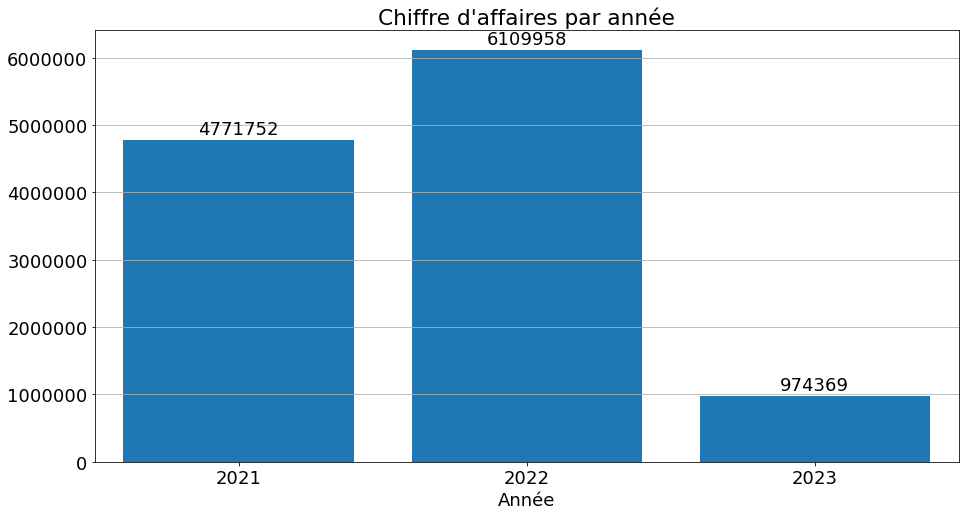

In [6]:
# Visualisation graphique du chiffre d'affaires par année
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0,0,1,1])
ax.ticklabel_format(axis="y", style='plain')

years = ['2021', '2022', '2023']
bars = ax.bar(years, ca_annuel)
ax.bar_label(bars, fmt= '%d', padding=2)

ca_annuel.plot(
    kind='bar',
    title="Chiffre d'affaires par année",
    xlabel='Année')

plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

L'année 2022 est la plus rentable à l'heure actuelle. L'année 2023 semble bien partie pour réaliser un score similaire.

# Customers

In [7]:
# Regroupement des customers depuis le dataframe
df_customers = df_final.groupby('client_id')[['price']].sum()

In [8]:
# Tri des custoemrs pour afficher celles et ceux qui ont dépensé(e)s le plus. On va en afficher 10 pour vérifier le tri.
df_customers_sorted = df_customers.sort_values('price', ascending=False)
display(df_customers_sorted.head(10))

,price
client_id,
c_1609,324033.35
c_4958,289760.34
c_6714,153662.76
c_3454,113669.85
c_3263,5276.87
c_1570,5271.62
c_2899,5214.05
c_2140,5208.82
c_7319,5155.77


- Première observation : 4 clients se démarquent du reste. Ces valeurs paraissent beaucoup trop grande pour que ce soit des particuliers
- Deuxième observation : Au vu des montants cumulés, il est fort probable que ce soit des entreprises/associations

On va donc analyser le B2B et B2C. Le B2B correspond au "Business to Business", c'est un type de relation commerciale qui relie des entreprises à d'autres entreprises.
Pour le B2C, cela concerne les relations commerciales allant de business à particuliers ("Business to Customers").

## <a class="anchor" id="section_2_1">Clients B2C</a> - Création d'un df pour stocker les clients B2C

In [9]:
# Création d'une copie du dataframe pour ensuite enlever les clients B2B sans perdre de données
df_B2C = df_final.copy()

In [10]:
# Supressions des clients B2B dans le dataframe B2C
df_B2C.drop(df_B2C[(df_B2C["client_id"] == "c_1609")].index, inplace=True)
df_B2C.drop(df_B2C[(df_B2C["client_id"] == "c_4958")].index, inplace=True)
df_B2C.drop(df_B2C[(df_B2C["client_id"] == "c_6714")].index, inplace=True)
df_B2C.drop(df_B2C[(df_B2C["client_id"] == "c_3454")].index, inplace=True)

In [11]:
df_B2C.shape

(632689, 13)

In [12]:
df_final.shape

(679332, 13)

## <a class="anchor" id="section_2_2">Clients B2B</a> - Création d'un df pour stocker les clients B2B

In [13]:
# Création d'un df pour analyser ces 4 clients non-particuliers pour quelques cellules plus bas
df_B2B = df_final.loc[
    (df_final['client_id']=='c_1609') | 
    (df_final['client_id']=='c_4958') | 
    (df_final['client_id']=='c_6714') | 
    (df_final['client_id']=='c_3454'),
    :]

In [14]:
# Stockage des informations par ces 4 clients dans des variables séparés
client_1609 = df_B2B.loc[df_B2B['client_id'] == 'c_1609', :]
client_4958 = df_B2B.loc[df_B2B['client_id'] == 'c_4958', :]
client_6714 = df_B2B.loc[df_B2B['client_id'] == 'c_6714', :]
client_3454 = df_B2B.loc[df_B2B['client_id'] == 'c_3454', :]

In [15]:
# On fait un pivot en prenant comme index l'année. 
# On va pouvoir également afficher le chiffre d'affaires de ces 4 clients par catégorie
df_B2B_categ = pd.pivot_table(df_B2B, index='year', columns='categ', values='price', aggfunc={'price' : 'sum'})

In [16]:
display(client_3454)

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,year,month,day,range age
58811,1_731,2022-11-12 22:02:56,s_296642,c_3454,11.99,1,m,1969,53,2022,11,12,51-55
58812,1_622,2022-06-11 03:46:16,s_221971,c_3454,17.41,1,m,1969,53,2022,6,11,51-55
58813,0_1280,2023-01-15 22:52:10,s_327467,c_3454,11.96,0,m,1969,53,2023,1,15,51-55
58814,1_285,2021-12-16 11:06:03,s_135210,c_3454,14.99,1,m,1969,53,2021,12,16,51-55
58815,0_1197,2022-06-27 14:34:46,s_230067,c_3454,6.99,0,m,1969,53,2022,6,27,51-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65579,0_1810,2023-01-26 13:50:58,s_332688,c_3454,5.96,0,m,1969,53,2023,1,26,51-55
65580,1_277,2022-07-25 04:51:13,s_243399,c_3454,25.99,1,m,1969,53,2022,7,25,51-55
65581,1_442,2022-01-25 20:40:55,s_155151,c_3454,24.98,1,m,1969,53,2022,1,25,51-55
65582,0_1586,2022-03-11 14:21:30,s_177655,c_3454,12.71,0,m,1969,53,2022,3,11,51-55


## <a class="anchor" id="section_2_3">Clients B2B réunis</a> - Chiffre d'affaires réunis

In [17]:
# Vérification du pivot
display(df_B2B_categ)

categ,0,1,2
year,,,
2021,129544.87,115427.78,111589.20
2022,148022.00,163984.84,141307.24
2023,23059.17,24877.08,23314.12


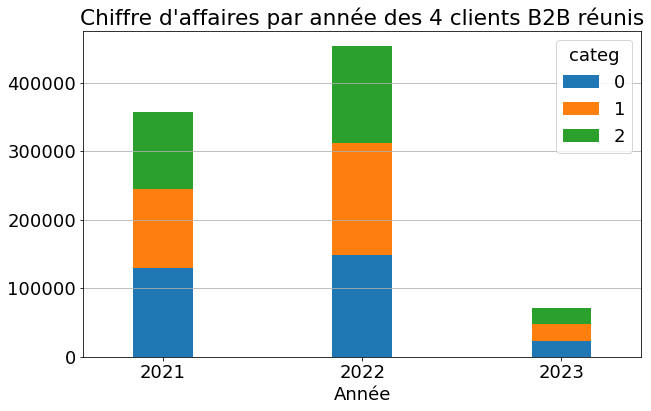

In [18]:
# Visualisation graphique des informations ci-dessus
df_B2B_categ.plot(
    kind='bar',
    title="Chiffre d'affaires par année des 4 clients B2B réunis",
    xlabel="Année",
    stacked=True,
    figsize=(10,6),
    width=0.3)

plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

On peut remarquer, avec le tableau et le graphique, que le CA des 4 clients B2B réunis est d'un niveau légèrement égal si on additionne les trois catégories.

Nous allons maintenant regarder le CA de ces 4 clients B2B mais séparés.

## <a class="anchor" id="section_2_4">Clients B2B séparés</a> - Chiffre d'affaires séparés

In [19]:
# On effectue un nouveau pivot pour séparer le CA de ces 4 clients B2B et les comparer
client_1609_categ = pd.pivot_table(client_1609, index='year', columns='categ', values='price', aggfunc={'price' : 'sum'})
client_4958_categ = pd.pivot_table(client_4958, index='year', columns='categ', values='price', aggfunc={'price' : 'sum'})
client_6714_categ = pd.pivot_table(client_6714, index='year', columns='categ', values='price', aggfunc={'price' : 'sum'})
client_3454_categ = pd.pivot_table(client_3454, index='year', columns='categ', values='price', aggfunc={'price' : 'sum'})

In [20]:
client_1609_categ_styler = client_1609_categ.style.set_table_attributes("style='display:inline'").set_caption('client 1609')
client_4958_categ_styler = client_4958_categ.style.set_table_attributes("style='display:inline'").set_caption('client 4958')
client_6714_categ_styler = client_6714_categ.style.set_table_attributes("style='display:inline'").set_caption('client 6714')
client_3454_categ_styler = client_3454_categ.style.set_table_attributes("style='display:inline'").set_caption('client 3454')

display_html(client_1609_categ_styler._repr_html_()+
             client_4958_categ_styler._repr_html_()+
             client_6714_categ_styler._repr_html_()+
             client_3454_categ_styler._repr_html_(), raw=True)

categ,0,1,2
year,,,
2021,93013.470000,41364.630000,771.260000
2022,105345.960000,58574.090000,437.970000
2023,16087.810000,8146.180000,291.980000
categ,0,1,2
year,,,
2021,48.760000,15147.500000,101324.360000
2022,nan,21086.050000,129161.610000
2023,nan,3141.690000,19850.370000
categ,0,1,2


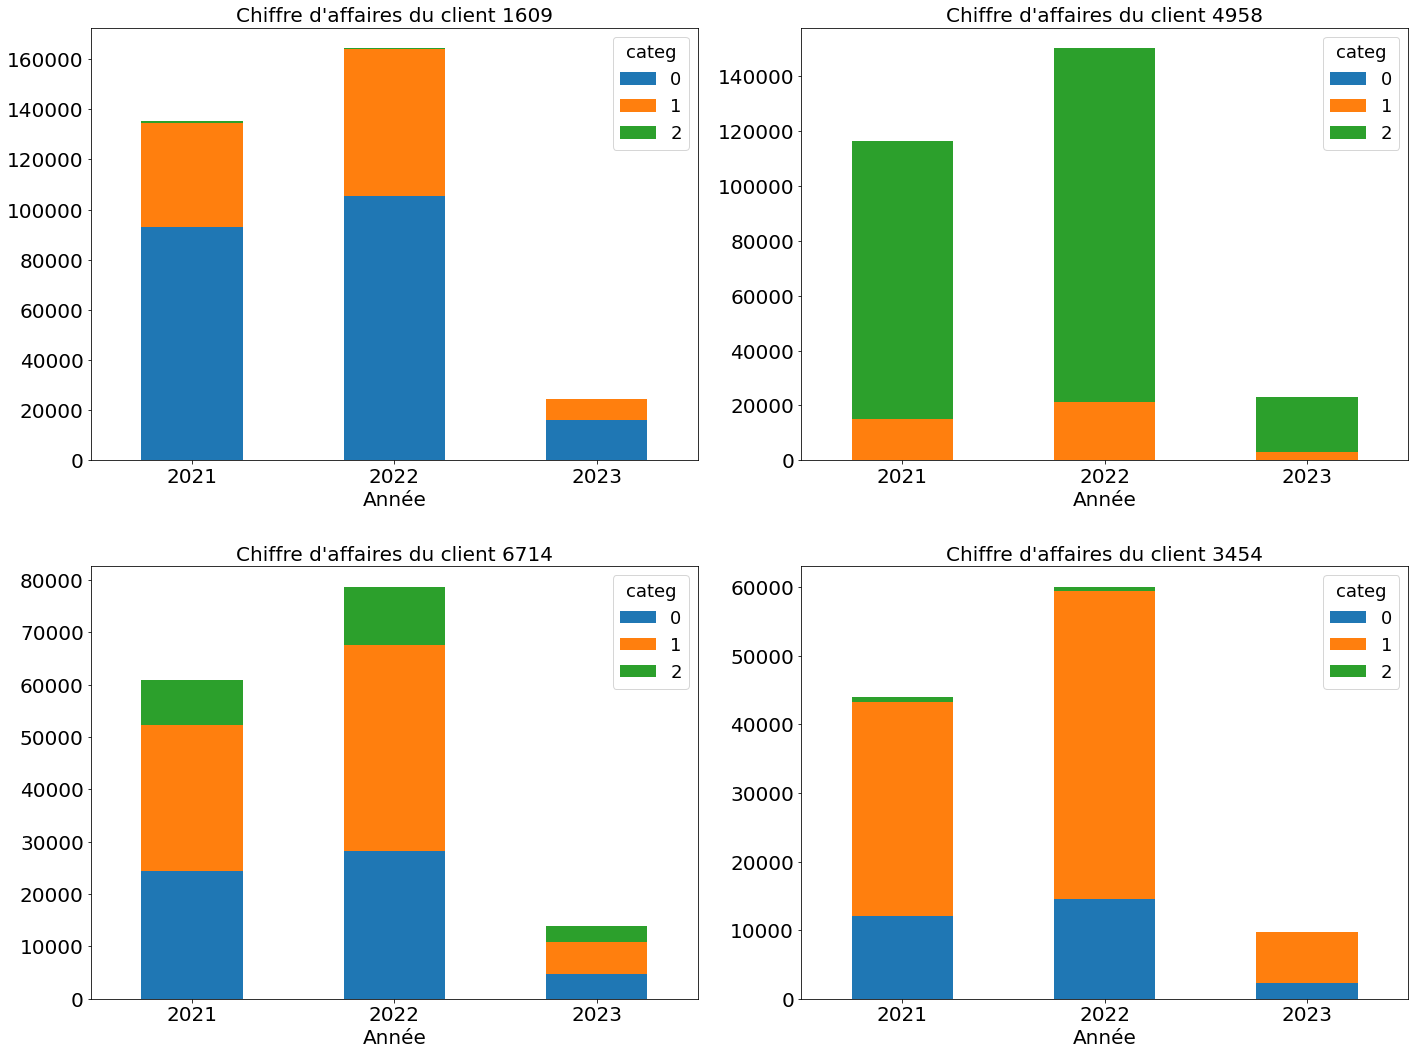

In [21]:
fig, axes = plt.subplots(
    nrows=2, 
    ncols=2,
    figsize=(20,15))

client_1609_categ.plot(kind='bar',
                      stacked=True,
                      ax=axes[0,0])
axes[0,0].set_title("Chiffre d'affaires du client 1609", fontsize=20)

client_4958_categ.plot(kind='bar',
                      stacked=True,
                      ax=axes[0,1])
axes[0,1].set_title("Chiffre d'affaires du client 4958", fontsize=20)

client_6714_categ.plot(kind='bar',
                      stacked=True,
                      ax=axes[1,0])
axes[1,0].set_title("Chiffre d'affaires du client 6714", fontsize=20)

client_3454_categ.plot(kind='bar',
                      stacked=True,
                      ax=axes[1,1])
axes[1,1].set_title("Chiffre d'affaires du client 3454", fontsize=20)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=0, fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("Année", fontsize=20)

plt.tight_layout(h_pad=2)
plt.show()

Par rapport au CA des 4 clients B2B réunis, on peut lister différentes informations :
- le client 1609 est plutôt axé sur la catégorie 0 et 1. Il n'effectue pratiquement aucun achat de la catégorie 2
- le client 4958, quant à lui, on voit une très nette domination de la catégorie 2 (ce qui complète avec le client 1609)
- le client 6714 achète en grande partie des produits de la catégorie 1 et une plus petite partie pour la catégorie 0
- pour finir, le client 3454, achète essentiellement des produits de la catégorie 1, et une petite partie pour la catégorie 0

Le client 4958 est le seul à acheter en très grande partie des produits de la catégorie 2. C'est essentiellement lui qui rapporte du CA pour cette catégorie. Son business est sans doute très différents des trois autres clients B2B.

In [22]:
# Chiffre d'affaires généré par ces 4 clients
ca_B2B = df_B2B['price'].sum()

print("Le chiffre d'affaires total généré par ces 4 clients est de {:,.2f} € "
      .format(ca_B2B)
      .replace(',',' '))

Le chiffre d'affaires total généré par ces 4 clients est de 881 126.30 € 


In [23]:
# Proportion de ces 4 clients par rapport au chiffre d'affaires total
proportion_ca_B2B = ca_B2B / ca_total*100

print("La proportion du chiffre d'affaires généré par ces 4 clients, par rapport au chiffre d'affaires total est de {:,.2f} % "
      .format(proportion_ca_B2B))

La proportion du chiffre d'affaires généré par ces 4 clients, par rapport au chiffre d'affaires total est de 7.43 % 


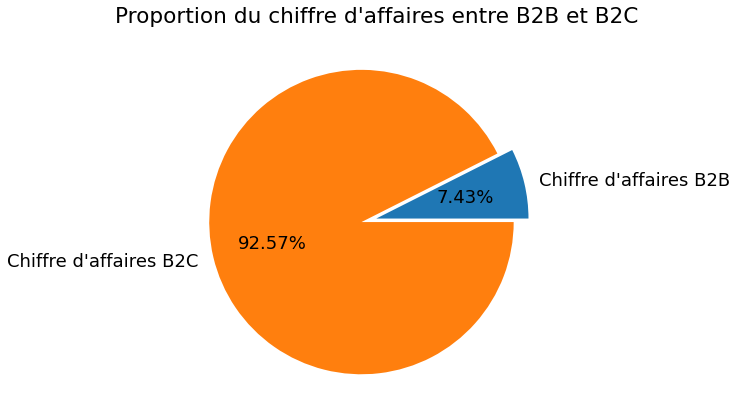

In [24]:
# Représentation graphique des proportions entre B2B et B2C
# Pour le calcul du chiffre d'affaires B2C, le chiffre d'affaires est divisé par lui-même puis multiplié par 100
# Une fois le premier résultat atteint (100%), on soustrait la proportion du chiffre d'affaires B2B de ce résultat
# Ce qui donne 92.57
proportion_ca_B2C = (ca_total / ca_total * 100) - proportion_ca_B2B
portion = [proportion_ca_B2B, proportion_ca_B2C]
labels = ["Chiffre d'affaires B2B", "Chiffre d'affaires B2C"]

plt.figure(figsize=(11, 7)) 
plt.pie(
    portion, 
    labels=labels,
    autopct='%.2f%%',
    explode=(0, 0.1),
    )
plt.title("Proportion du chiffre d'affaires entre B2B et B2C")
plt.show()

## <a class="anchor" id="section_2_5">Courbe de Lorenz</a> - Chiffre d'affaires et clients

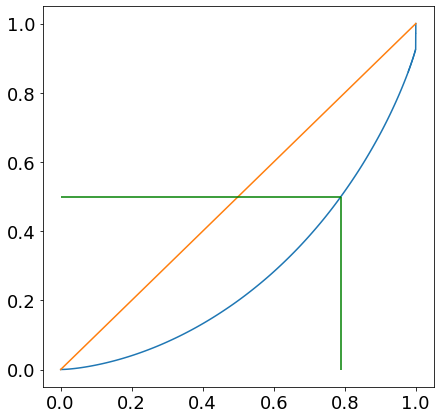

Indice de gini : 0.45


In [25]:
cum = df_customers.cumsum()
depenses = df_customers['price']
n = len(cum)

lorenz = np.cumsum(np.sort(depenses)) / depenses.sum()
lorenz = np.append([0], lorenz)

# Calcul de l'intersection
medial = lorenz[(lorenz < 0.5)].size / lorenz.size

# Création du graphique et ajout des points pour établir les intersections
plt.figure(figsize=(7,7))
plt.plot(np.linspace(0,1, len(lorenz)), lorenz, drawstyle="steps-post")
plt.plot(np.linspace(0,1, len(lorenz)), np.linspace(0,1,len(lorenz)))

# Incrustation de la médiane pour qu'elle s'arrête à l'intersection calculée à l'horizontal, soit 0.5
plt.hlines(xmin=medial, xmax=0, y=.5, color='green')

# Incrustation de la mediane pour qu'elle s'arrête à l'intersection calculée à la verticale, soit 0.5
plt.vlines(medial, ymin=0, ymax=0.5, color='green')
plt.show()

# Calcul de l'indice de gini
AUC = (lorenz.sum() - lorenz[-1] / 2 - lorenz[0] / 2) / n
S = 0.5 - AUC
gini = 2*S
print(f"Indice de gini : {gini:.2f}")

Conclusion : l'indice de gini est à 0.45. Il n'y a donc pas d'inégalité entre les clients et leurs achats pour la totalité du chiffre d'affaires.

# Sexe

## <a class="anchor" id="section_3_1">Nombre d'achats et chiffre d'affaires</a> - Résultats pour le genre

In [26]:
# Récupération du nombre de transactions le dataframe
nombre_transactions = df_final['id_prod'].count()
print(f"Il y a",nombre_transactions, "transactions.")

Il y a 679332 transactions.


In [27]:
achats_genre = df_final.groupby('sex')['price'].agg(['count', 'sum'])
display(achats_genre)

,count,sum
sex,,
f,338402,5860928.01
m,340930,5995152.11


In [28]:
# Nombre d'achats par le genre féminin
nombre_achats_sexe_femme = achats_genre['count'].iloc[0]

# Nombre d'achats par le genre masculin
nombre_achats_sexe_homme = achats_genre['count'].iloc[1]

# Récupération du chiffre d'affaires pour le genre féminin
ca_sexe_femme = achats_genre['sum'].iloc[0]

# Récupération du chiffre d'affaires pour le genre masculin
ca_sexe_homme = achats_genre['sum'].iloc[1]


print("Les clientes ont effectuées {:,.0f} achats.".format(nombre_achats_sexe_femme).replace(',', ' '))
print("Les clients ont effectuées {:,.0f} achats.".format(nombre_achats_sexe_homme).replace(',', ' '))
print("Le chiffre d'affaires pour les clientes est de {:,.2f} €,".format(ca_sexe_femme).replace(',',' '))
print("Le chiffre d'affaires pour les clients est de {:,.2f} €,".format(ca_sexe_homme).replace(',',' '))

Les clientes ont effectuées 338 402 achats.
Les clients ont effectuées 340 930 achats.
Le chiffre d'affaires pour les clientes est de 5 860 928.01 € 
Le chiffre d'affaires pour les clients est de 5 995 152.11 € 


In [29]:
# Calcul de la proportion du chiffre d'affaires généré par les clients féminins et masculins
proportion_ca_femme = ca_sexe_femme / nombre_transactions * 100
proportion_ca_homme = ca_sexe_homme / nombre_transactions * 100

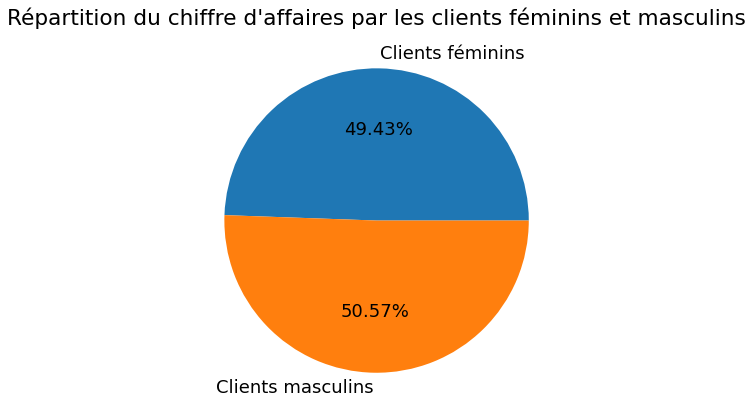

In [30]:
proportion_ca_genre = [proportion_ca_femme, proportion_ca_homme]

fig, ax = plt.subplots(figsize=(11,7))
ax.pie(proportion_ca_genre,
      labels=['Clients féminins', 'Clients masculins'],
      autopct="%.2f%%",
      )

plt.title("Répartition du chiffre d'affaires par les clients féminins et masculins")
plt.show()

In [31]:
# Proportion du nombre d'achats effectué par les clients féminins et masculins
proportion_nombre_achats_femme = nombre_achats_sexe_femme / nombre_transactions * 100
proportion_nombre_achats_homme = nombre_achats_sexe_homme / nombre_transactions * 100

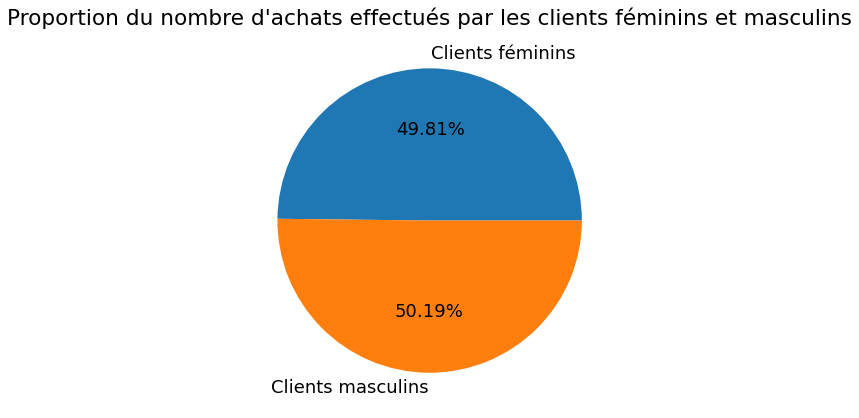

In [32]:
proportion_nombre_achats_genre = [proportion_nombre_achats_femme, proportion_nombre_achats_homme]

fig, ax = plt.subplots(figsize=(11,7))
ax.pie(proportion_nombre_achats_genre,
      labels=['Clients féminins', 'Clients masculins'],
      autopct="%.2f%%",
      )

plt.title("Proportion du nombre d'achats effectués par les clients féminins et masculins")
plt.show()

La répartition est assez égale concernant le chiffre d'affaires et le nomdre d'achats effectué par les clients féminins et masculins.

## <a class="anchor" id="section_3_2">Lien entre le genre et les catégories</a> - Nombre d'achats par catégorie

In [33]:
nombre_achats_genre_categ = pd.pivot_table(df_B2C,
                                          index={'sex'},
                                          columns='categ',
                                          values='price',
                                          aggfunc={'price' : 'count'})
nombre_achats_genre_categ

categ,0,1,2
sex,,,
f,200904,111331,16980
m,186589,101017,15868


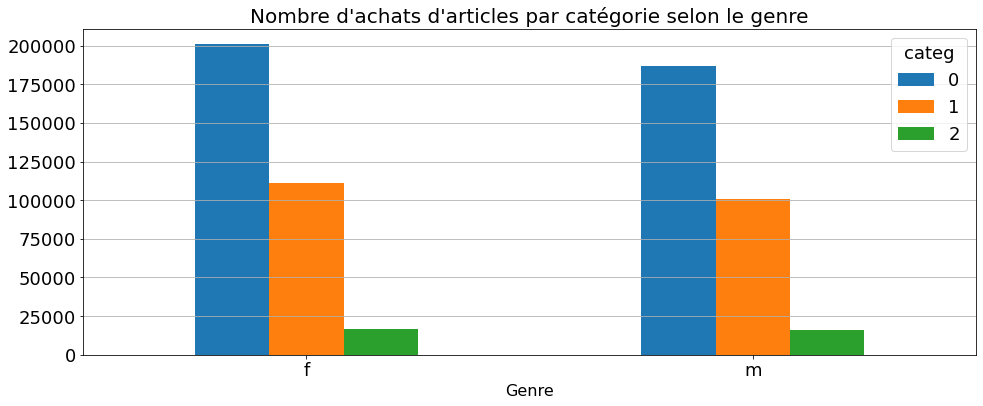

In [34]:
nombre_achats_genre_categ.plot(kind='bar', figsize=(16,6))

plt.title("Nombre d'achats d'articles par catégorie selon le genre", fontsize=20)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation='0')
plt.xlabel("Genre", fontsize=16)
plt.grid(axis='y')
plt.show()

# Age

## <a class="anchor" id="section_4_1">Nombre de clients</a> - Répartition par tranches d'âges

In [38]:
df_age = df_B2C.groupby('range age').agg({
    'client_id' : 'count',
    'price' : 'sum'
})

In [39]:
df_age = df_age.reset_index()

In [40]:
df_clients_age = df_age[['range age', 'client_id']]

In [41]:
df_clients_age = df_clients_age.rename(columns = {
    'client_id' : 'number of clients'
})

In [42]:
df_clients_age = df_clients_age.sort_values(by='range age')

In [43]:
df_clients_age

,range age,number of clients
0,18-23,37820
1,24-28,26473
2,29-34,86443
3,35-39,99554
4,40-44,110497
5,45-50,107586
6,51-55,43954
7,56-60,36333
8,61-66,35325
9,67-71,20590


In [44]:
df_clients_age = df_clients_age.set_index('range age')

On remarque dans un premier temps que les tranches d'âge 40-44, 45-50, 35-39 et 29-34 se démarquent du reste. Ce qui correspond de 29 à 50 ans inclus.

On note également que les personnes au dessus de 72 ans sont peu dans leurs tranches respectives.

Confirmons tout ceci avec un graphique.

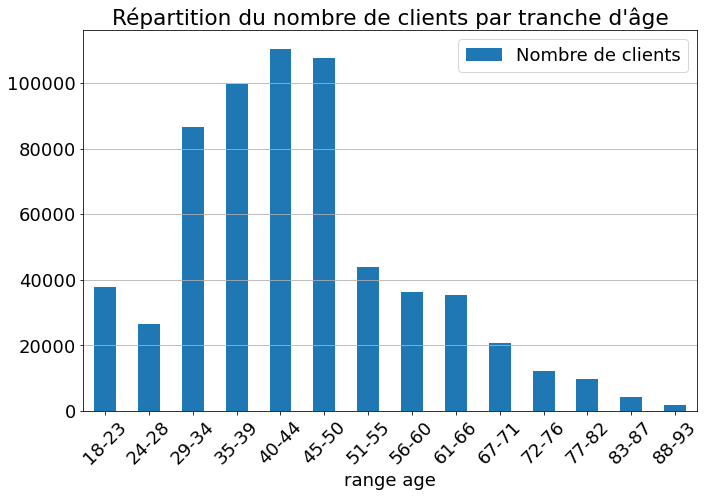

In [45]:
df_clients_age.plot(
    kind='bar',
    title="Répartition du nombre de clients par tranche d'âge",
    figsize=(11, 7))

plt.xticks(rotation=45)
plt.legend(["Nombre de clients"])
plt.grid(axis='y')
plt.show()

- On retrouve nos tranches d'âge 29-34, 35-39, 40-44 et 45-50 
- On retrouve également nos tranches d'âge 72-76, 77-82, 83-87 et 88-93

## <a class="anchor" id="section_4_2">Catégories d'achats</a> - Répartition selon les tranches d'âges

In [46]:
categ_count_range_age = pd.pivot_table(df_B2C,
                                      index={'range age'},
                                      columns='categ', 
                                      values='id_prod',
                                      aggfunc={'id_prod' : 'count'})

categ_count_range_age

categ,0,1,2
range age,,,
18-23,8601,14222,14997
24-28,5813,9897,10763
29-34,60527,21475,4441
35-39,75737,23497,320
40-44,83787,26260,450
45-50,81656,25547,383
51-55,19131,24421,402
56-60,15614,20410,309
61-66,15491,19485,349


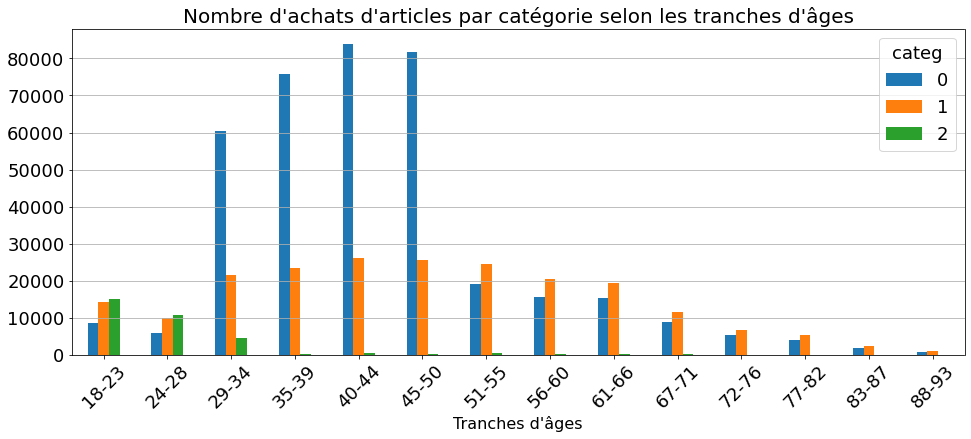

In [47]:
categ_count_range_age.plot(kind='bar',
                          figsize=(16,6))

plt.title("Nombre d'achats d'articles par catégorie selon les tranches d'âges", fontsize=20)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation='45')
plt.xlabel("Tranches d'âges", fontsize=16)
plt.grid(axis='y')
plt.show()

Selon les trois catégories, différentes conclusions peuvent en sortir concernant le nombre d'achats :

- Concernant la catégorie 0 :
    - La grande majorité est essentiellement acheté par les 29-50 ans
    - En dehors de cette grande tranche, le reste de la clientèle n'est pas réellement intéressé
 
- Concernant la catégorie 1 :
    - Le nombre d'achats est stable pour toutes les tranches d'âges, à l'exception des 72-93 ans
    - On retrouve tout de même un léger pic pour les 40-44 ans et 51-55 ans
    
- Concernant la catégorie 2 :
    - Les 18-28 ans achètent à eux seuls plus que la totalité du reste des tranches d'âges réunis
    - Passé cette tranche, cela baisse d'un coup. Jusqu'à presque disparaitre à partir des 35 ans, jusqu'aux 93 ans (moins de 100 articles.
    


In [48]:
# Répartition des catégories d'achats par tranches d'âges
categ_range_age = pd.pivot_table(df_B2C, index={'range age'}, columns='categ', values='price', aggfunc={'price': 'sum'})

# Aperçu de l'affichage
display(categ_range_age)

categ,0,1,2
range age,,,
18-23,91978.89,291830.49,1130873.52
24-28,61490.85,203097.90,815685.07
29-34,645840.40,441849.96,332116.02
35-39,805598.48,477575.83,29864.31
40-44,891179.21,537912.63,41891.48
45-50,864273.39,522719.50,33966.65
51-55,204761.65,500897.48,31061.31
56-60,164911.39,419046.81,26283.91
61-66,166169.88,399652.58,29706.33


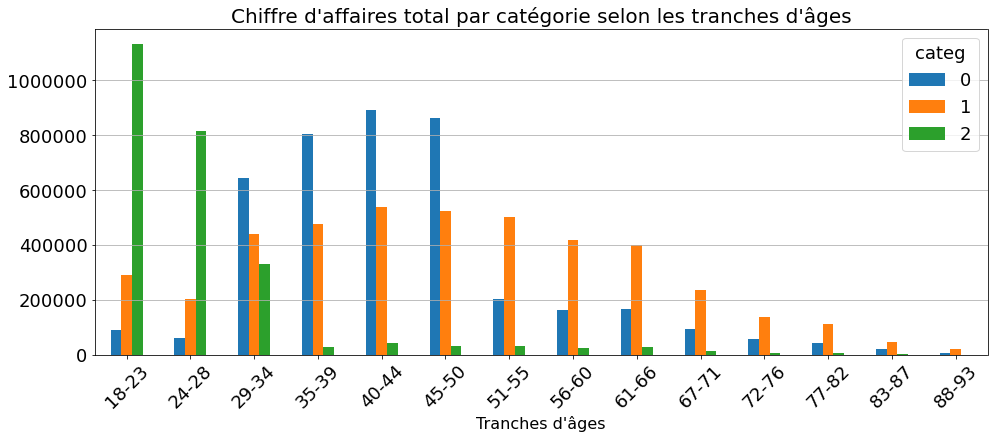

In [49]:
categ_range_age.plot(kind='bar',
                     figsize=(16,6)
                    )

plt.title("Chiffre d'affaires total par catégorie selon les tranches d'âges", fontsize=20)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation='45')
plt.xlabel("Tranches d'âges", fontsize=16)
plt.grid(axis='y')
plt.show()

Selon les trois catégories, différentes conclusions peuvent en sortir :

- Concernant la catégorie 0 :
    - La très grande partie du chiffre d'affaires est réparti sur les tranches d'âges de 29 à 50 ans
    - En dehors de cette grande tranche d'âge, la catégorie 0 rapporte très peu
 
- Concernant la catégorie 1 :
    - Le chiffre d'affaires reste stable pour toutes les tranches d'âges, à l'exception des 72-93 ans
    - On retrouve tout de même un léger pic pour les 40-44 ans et 51-55 ans
    
- Concernant la catégorie 2 :
    - Les 18-28 an représentent à eux seuls une très grande partie du chiffre d'affaires
    - Passé cette tranche, cela baisse d'un coup. Jusqu'à presque disparaitre à partir des 35 ans, jusqu'aux 93 ans.
    


## <a class="anchor" id="section_4_3">Chiffre d'affaires</a> - Répartition par tranches d'âges

In [50]:
df_ca_age = df_age[['range age', 'price']]

In [51]:
df_ca_age = df_age.groupby('range age').agg({
    'price': 'sum'
})

In [52]:
df_ca_age = df_ca_age.sort_values('price', ascending=False)

In [53]:
df_ca_age

,price
range age,
18-23,1514682.90
40-44,1470983.32
45-50,1420959.54
29-34,1419806.38
35-39,1313038.62
24-28,1080273.82
51-55,736720.44
56-60,610242.11
61-66,595528.79


Notre top 3 en terme de chiffre d'affaires par tranches d'âges se trouve avec les 18-23 ans, 40-44 ans et 45-50 ans. Suivi de très près par les 29-34 ans.

Concernant les trois dernières tranches d'âges en terme de chiffre d'affaires, on retrouve les 77-82 ans, 83-87 ans et 88-93 ans.

Regardons de plus près avec un graphique.

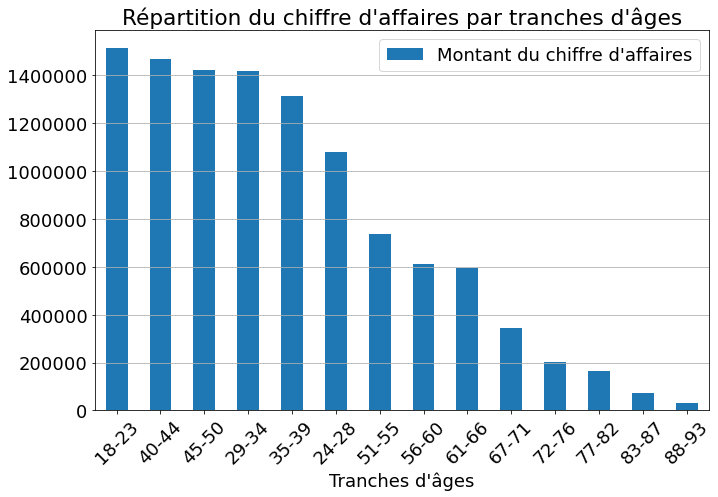

In [54]:
df_ca_age.plot(
    kind='bar',
    title="Répartition du chiffre d'affaires par tranches d'âges",
    xlabel="Tranches d'âges",
    figsize=(11, 7))

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(["Montant du chiffre d'affaires"])
plt.ticklabel_format(style='plain', axis='y')
plt.show()

On retrouve ici nos conclusions précédentes avec nos tranches d'âges les plus hautes pour le chiffre d'affaires.

## <a class="anchor" id="section_4_4">Focus sur trois grandes tranches d'âges</a> - Zoom sur celles qui sortent du lot

In [55]:
categ_ca_age = df_B2C.groupby(['age', 'categ'])[['price']].sum()
categ_ca_age

price
age categ          
18  0      35914.36
    1     118362.47
    2     454736.86
19  0       9560.43
    1      34435.66
...             ...
92  1       3074.34
    2        111.98
93  0        716.76
    1       2359.10
    2        145.99

[228 rows x 1 columns]

In [56]:
categ_ca_age = categ_ca_age.reset_index()

In [57]:
# Séparation des trois grandes tranches d'âges en trois dataframes

categ_ca_age_1828 = categ_ca_age.query('18 <= age <= 28')
categ_ca_age_2950 = categ_ca_age.query('29 <= age <= 50')
categ_ca_age_5166 = categ_ca_age.query('51 <= age <= 66')

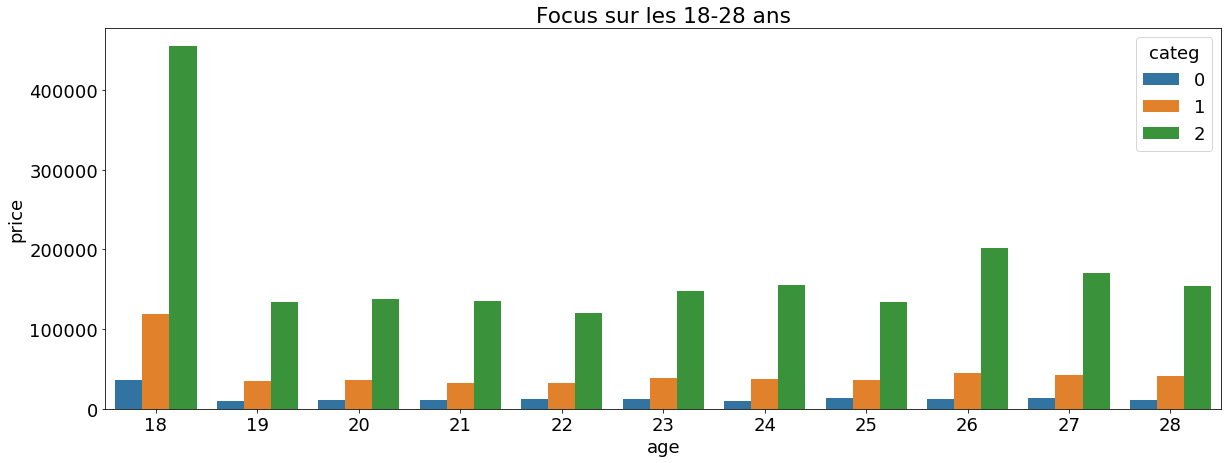

In [58]:
plt.figure(figsize=(20, 7))
sns.barplot(data=categ_ca_age_1828, x="age", y="price", hue="categ")
plt.title("Focus sur les 18-28 ans")
plt.show()

On remarque que les 18 ans représentent une très grande partie du chiffre d'affaires concernant la catégorie 2. Il y a de très grandes chances que ça soit lié au fait qu'il faille minimum 18 ans pour s'inscrire et acheter.

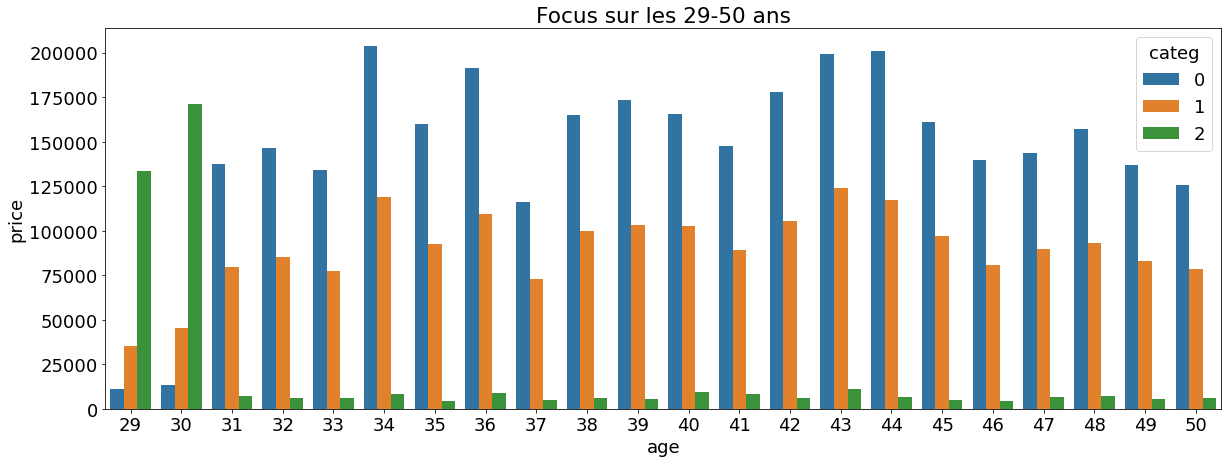

In [59]:
plt.figure(figsize=(20, 7))
sns.barplot(data=categ_ca_age_2950, x="age", y="price", hue="categ")
plt.title("Focus sur les 29-50 ans")
plt.show()

Léger pic d'achats de la catégorie 0 pour les 34, 42 et 43 ans.

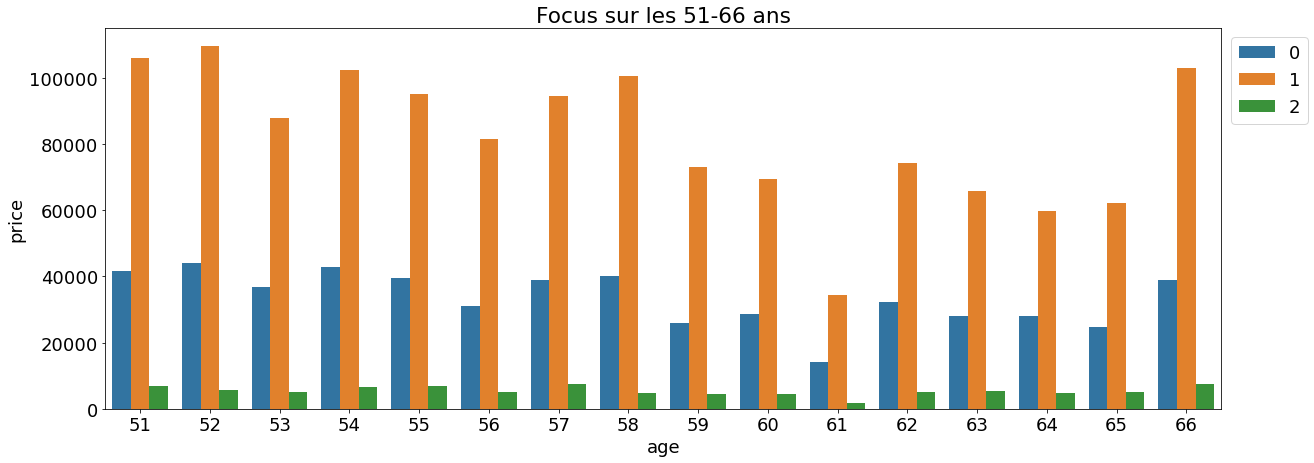

In [60]:
plt.figure(figsize=(20, 7))
sns.barplot(data=categ_ca_age_5166, x="age", y="price", hue="categ")
plt.title("Focus sur les 51-66 ans")
plt.legend(bbox_to_anchor=(1.001, 1))
plt.show()

Concernant les 51-66 ans, c'est assez stable sur toute la tranche. A part une légère baisse chez les 61 ans.

# Produits

In [64]:
# On commence par faire un pivot pour représenter le chiffre d'affaires des catégories des produits par année
df_categs = pd.pivot_table(df_final, index={'year'}, columns='categ', values='price', aggfunc={'price' : 'sum'})
df_categs

categ,0,1,2
year,,,
2021,1883946.13,1777995.85,1109810.26
2022,2194247.26,2485275.19,1430436.16
2023,343889.02,390451.65,240028.60


In [65]:
categs_describe = df_final.groupby('categ').agg({
    'price' : [
        'min',
        'max',
        'mean'
    ]
}) 
categs_describe

price             
        min    max  mean
categ                   
0      0.62  40.99 10.64
1      2.00  80.99 20.49
2     30.99 300.00 76.21

On peut déjà noter quelques premières informations :
- La catégorie 0 a l'air de correspondre à des produits bas de gamme, comparé au reste. Avec une moyenne à 10,64 € (comme vu précédemment)
- La catégorie 1 est plutôt en moyenne gamme avec une moyenne à 20,49 €
- La catégorie 2 est situé dans le haut de gamme. Avec un premier prix à 30,99 €, et un maximum à 300 €. Pour une moyenne de 76,21 €

Regardons plus en détails avec un boxplot ci-dessous.

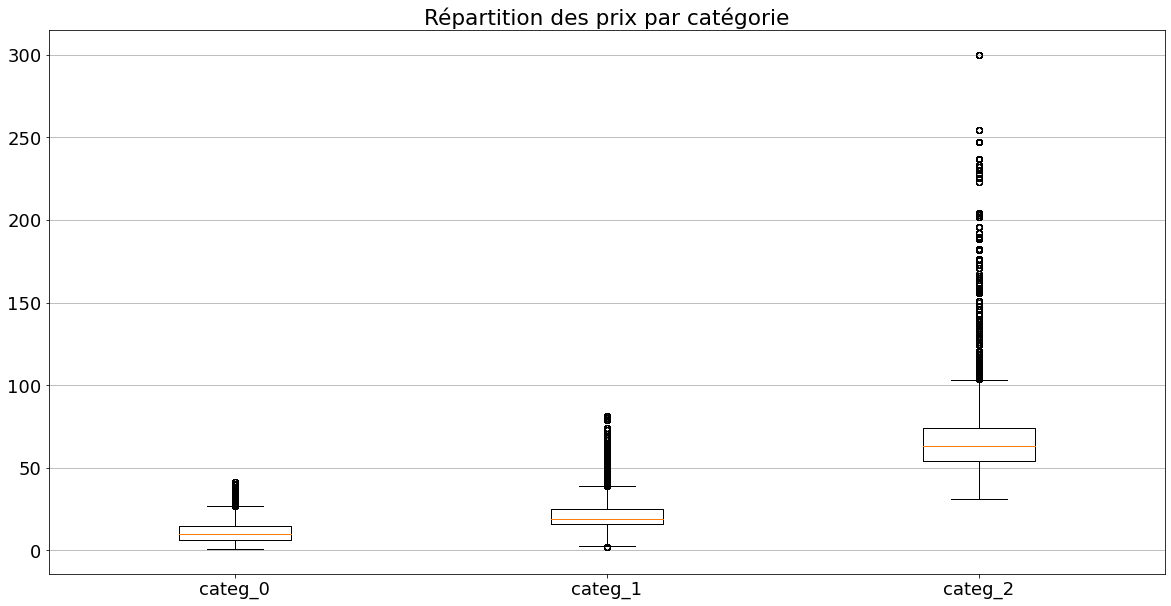

In [66]:
# On avait vu dans le premier notebook, la moyenne des prix des trois catégories avec un boxplot. Regardons ici plus en détails
categ_0_prices = df_final[df_final['categ'] == 0]['price']
categ_1_prices = df_final[df_final['categ'] == 1]['price']
categ_2_prices = df_final[df_final['categ'] == 2]['price']

columns = [categ_0_prices, categ_1_prices, categ_2_prices]
fix, ax = plt.subplots(figsize=(20, 10))

ax.boxplot(columns)
plt.xticks(
    [1, 2, 3],
    ["categ_0", "categ_1", "categ_2"])
plt.title("Répartition des prix par catégorie")
plt.grid(axis='y')
plt.show()

Notre boxplot confirme notre analyse précédente sur les gammes de prix des trois catégories.

## <a class="anchor" id="section_5_1">Moyenne mobile</a> - 03/2021 à 02/2023

In [67]:
# Création d'un df réunissant les dates, prix et catégories
df_moyenne_mobile = df_final[['date', 'price', 'categ']]

# Aperçu du dataframe
display(df_moyenne_mobile)

,date,price,categ
0,2022-05-20 13:21:29,4.18,0
1,2022-06-18 05:55:31,3.99,0
2,2023-02-08 17:31:06,13.21,0
3,2021-04-20 06:18:39,19.37,0
4,2022-03-15 19:54:53,8.99,0
...,...,...,...
679327,2021-05-15 08:17:35,4.99,0
679328,2021-11-08 17:12:27,11.06,1
679329,2021-06-01 04:31:16,50.99,2
679330,2022-10-18 00:38:49,22.99,1


In [68]:
# Création d'une colonne pour stocker seulement le mois et l'année de chaque transaction
df_moyenne_mobile['year_month'] = pd.to_datetime(df_final['date']).dt.to_period('M')

C:\Users\Walid\AppData\Local\Temp\ipykernel_1332\2337274624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_moyenne_mobile['year_month'] = pd.to_datetime(df_final['date']).dt.to_period('M')


In [69]:
# On va grouper le suivi du chiffre d'affaires mois par mois de chaque catégorie
df_moyenne_mobile = df_moyenne_mobile.groupby([
    'year_month', 'categ'
]).agg({
    'price' : 'sum'
}).reset_index()

In [70]:
# On trie la colonne "year_month" par la moyenne en allant de la plus petite à la plus grande
df_moyenne_mobile = df_moyenne_mobile.sort_values('year_month')

In [71]:
# On va mettre l'index sur la colonne "year_month"
df_moyenne_mobile = df_moyenne_mobile.set_index(['year_month'])

In [72]:
df_moyenne_mobile['rolling_mean'] = df_moyenne_mobile['price'].rolling(3, min_periods=1).mean()

In [73]:
df_moyenne_mobile.reset_index(inplace=True)

In [74]:
df_moyenne_mobile['year_month'] = df_moyenne_mobile['year_month'].astype('str')

In [75]:
df_moyenne_mobile = df_moyenne_mobile.reset_index()

In [76]:
df_moyenne_mobile

,index,year_month,categ,price,rolling_mean
0,0,2021-03,0,193724.93,193724.93
1,1,2021-03,1,186974.17,190349.55
2,2,2021-03,2,101837.27,160845.46
3,3,2021-04,0,205371.42,164727.62
4,4,2021-04,1,156138.35,154449.01
...,...,...,...,...,...
67,67,2023-01,0,181357.54,171755.01
68,68,2023-01,2,126153.08,172538.34
69,69,2023-02,1,180347.24,162619.29
70,70,2023-02,0,162531.48,156343.93


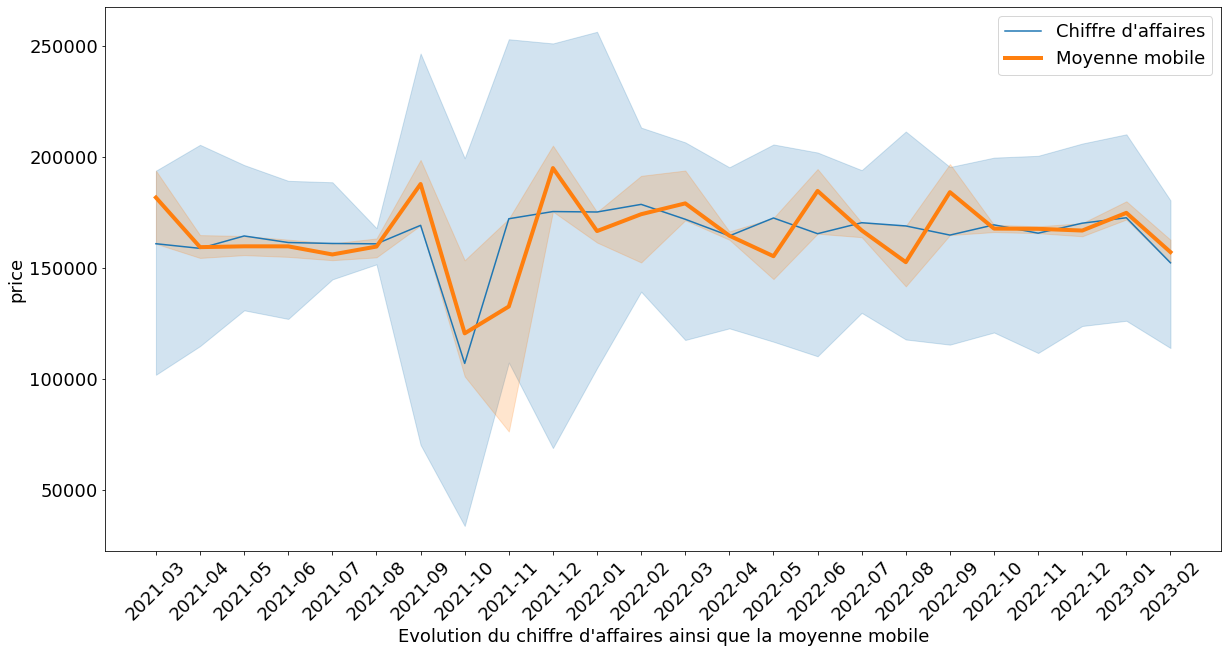

In [77]:
plt.figure(figsize=(20, 10))

sns.lineplot(data=df_moyenne_mobile,
            x='year_month',
            y=df_moyenne_mobile['price'],
            label="Chiffre d'affaires")

sns.lineplot(data=df_moyenne_mobile,
            x='year_month',
            y=df_moyenne_mobile['rolling_mean'],
            label="Moyenne mobile",
            linewidth=4)

plt.xlabel("Evolution du chiffre d'affaires ainsi que la moyenne mobile")
plt.xticks(rotation=45)
plt.show()

On peut remarquer avec cette moyenne mobile, une tendance autour des vacances d'été ainsi que des vacances d'hiver.

In [78]:
# Création d'une variable pour regrouper le nombre d'articles par catégorie
nombre_articles_categ = df_final.groupby('categ').id_prod.count()
nombre_articles_categ

categ
0    415680
1    227169
2     36483
Name: id_prod, dtype: int64

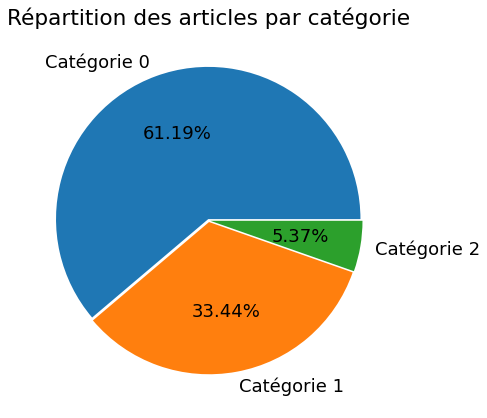

In [79]:
labels = ['Catégorie 0', 'Catégorie 1', 'Catégorie 2']

plt.figure(figsize=(11, 7)) 
plt.pie(nombre_articles_categ,
       labels=labels,
       autopct="%.2f%%",
       explode=(0.01, 0.01, 0.01), 
       )

plt.title('Répartition des articles par catégorie')
plt.show()

Grâce au count et au graphique, on peut déduire plusieurs informations :
- Il y a 61.19% des articles qui sont de catégorie 0 (bas de gamme)
- Il y a 33,44% des articles qui sont de catégorie 1 (moyenne gamme)
- Il y a 5.37% des articles qui sont de catégorie 2 (haut de gamme)

Il faut aussi dire qu'il n'y a clairement pas le même nombre d'articles pour chaque catégorie.

# Zoom sur les références

In [84]:
# Création d'un dataframe pour grouper et agréger les achats avec les catégories et les id
df_top_flop_ventes = df_final.groupby(["categ", "id_prod"]).agg({
    "price" : [
        "count",
        "sum"
    ]
})

# Affichage du dataframe
display(df_top_flop_ventes)

price         
              count      sum
categ id_prod               
0     0_0      1242  4657.50
      0_1       487  5352.13
      0_10       22   394.90
      0_100       3    61.80
      0_1000    432  2954.88
...             ...      ...
2     2_95        4   395.96
      2_96      598 28650.18
      2_97       13  2092.87
      2_98        1   149.74
      2_99        7   594.93

[3266 rows x 2 columns]

In [85]:
df_top_flop_ventes = df_top_flop_ventes.reset_index()

In [86]:
df_top_flop_ventes

categ id_prod price         
                   count      sum
0        0     0_0  1242  4657.50
1        0     0_1   487  5352.13
2        0    0_10    22   394.90
3        0   0_100     3    61.80
4        0  0_1000   432  2954.88
...    ...     ...   ...      ...
3261     2    2_95     4   395.96
3262     2    2_96   598 28650.18
3263     2    2_97    13  2092.87
3264     2    2_98     1   149.74
3265     2    2_99     7   594.93

[3266 rows x 4 columns]

## <a class="anchor" id="section_6_1">Zoom sur la catégorie 0</a> - Tops et flops

In [87]:
# Récupération des ventes de la catégorie 0 uniquement
top_flop_ventes_categ_0 = df_top_flop_ventes.loc[df_top_flop_ventes['categ'] == 0, :]

In [88]:
display(top_flop_ventes_categ_0)

categ id_prod price        
                   count     sum
0        0     0_0  1242 4657.50
1        0     0_1   487 5352.13
2        0    0_10    22  394.90
3        0   0_100     3   61.80
4        0  0_1000   432 2954.88
...    ...     ...   ...     ...
2288     0   0_995   368 4044.32
2289     0   0_996   427 4970.28
2290     0   0_997   438 4375.62
2291     0   0_998   450 4234.50
2292     0   0_999   410 4095.90

[2293 rows x 4 columns]

In [89]:
top_flop_ventes_categ_0 = top_flop_ventes_categ_0.sort_values(('price', 'count'), ascending=False)

display(top_flop_ventes_categ_0.head(5), 
        top_flop_ventes_categ_0.tail(5))

categ id_prod price         
                  count      sum
466     0  0_1422  1292 14741.72
476     0  0_1431  1282 14089.18
469     0  0_1425  1266 16445.34
477     0  0_1432  1254 19261.44
454     0  0_1411  1246 11201.54

categ id_prod price     
                   count  sum
1793     0   0_549     1 2.99
752      0  0_1683     1 2.99
313      0  0_1284     1 1.38
549      0  0_1498     1 2.48
166      0  0_1151     1 2.99

In [90]:
top_flop_ventes_categ_0 = top_flop_ventes_categ_0.set_index('id_prod')

In [91]:
top_flop_ventes_categ_0

categ price         
              count      sum
id_prod                     
0_1422      0  1292 14741.72
0_1431      0  1282 14089.18
0_1425      0  1266 16445.34
0_1432      0  1254 19261.44
0_1411      0  1246 11201.54
...       ...   ...      ...
0_549       0     1     2.99
0_1683      0     1     2.99
0_1284      0     1     1.38
0_1498      0     1     2.48
0_1151      0     1     2.99

[2293 rows x 3 columns]

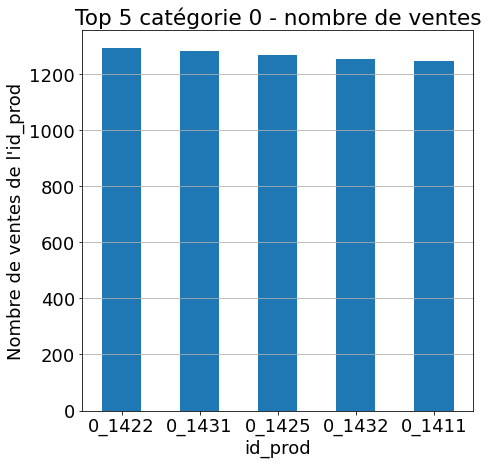

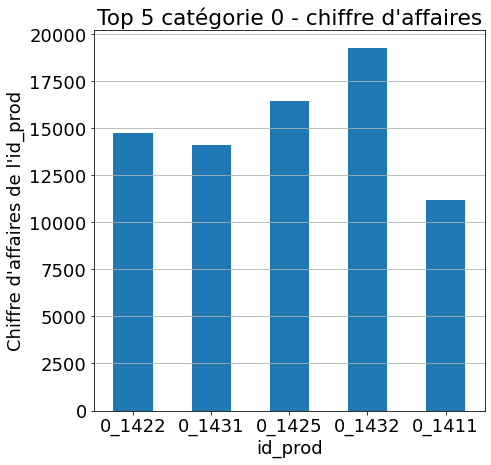

In [92]:
top_flop_ventes_categ_0['price', 'count'].head(5).plot(
    kind='bar',
    title="Top 5 catégorie 0 - nombre de ventes",
    xlabel='id_prod',
    ylabel="Nombre de ventes de l'id_prod",
    figsize=(7,7))

plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

top_flop_ventes_categ_0['price', 'sum'].head(5).plot(
    kind='bar',
    title="Top 5 catégorie 0 - chiffre d'affaires",
    xlabel='id_prod',
    ylabel="Chiffre d'affaires de l'id_prod",
    figsize=(7,7))

plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

- Conclusion sur le top/flop de la catégorie 0 :
    - Top :
        - Le nombre de ventes est assez similaire, entre 1292 et 1246 ventes
        - L'article 0_1432 est l'article qui rapporte le plus dans cette catégorie (chiffre d'affaires de 19261 €)

    - Flop :
         - 5 articles se partagent le bas des ventes avec une unité vendue

## <a class="anchor" id="section_6_2">Zoom sur la catégorie 1</a> - Tops et flops

In [93]:
# Création d'une variable pour stocker les tops et flops des produits de la catégorie 1
top_flop_ventes_categ_1 = df_top_flop_ventes.loc[df_top_flop_ventes["categ"] == 1, :]

In [94]:
top_flop_ventes_categ_1 = top_flop_ventes_categ_1.set_index('id_prod')

In [95]:
display(top_flop_ventes_categ_1)

categ price        
              count     sum
id_prod                    
1_1         1    37 1590.63
1_10        1    83 6542.89
1_100       1   167 2526.71
1_101       1    74  739.26
1_102       1    77  253.33
...       ...   ...     ...
1_95        1   150 3298.50
1_96        1    56  424.48
1_97        1   159 3814.41
1_98        1   180 4066.20
1_99        1   115 2528.85

[737 rows x 3 columns]

In [96]:
top_flop_ventes_categ_1 = top_flop_ventes_categ_1.sort_values(('price', 'count'), ascending=False)
display(top_flop_ventes_categ_1.head(5), 
        top_flop_ventes_categ_1.tail(5))

categ price         
              count      sum
id_prod                     
1_369       1  2252 54025.48
1_417       1  2189 45947.11
1_414       1  2180 51949.40
1_498       1  2128 49731.36
1_425       1  2096 35611.04

categ price       
              count    sum
id_prod                   
1_408       1     3 105.72
1_409       1     3 167.97
1_402       1     2  69.04
1_420       1     2  14.24
1_514       1     2 135.32

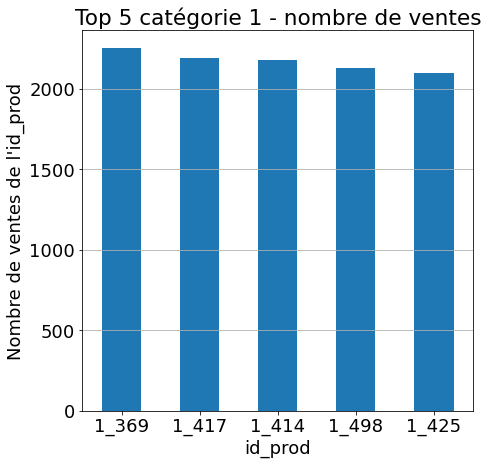

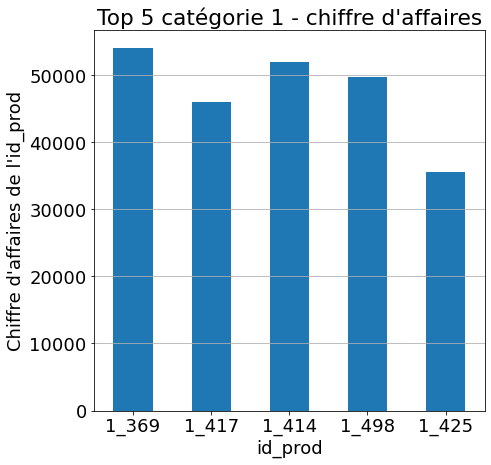

In [97]:
top_flop_ventes_categ_1['price', 'count'].head(5).plot(
    kind='bar',
    title="Top 5 catégorie 1 - nombre de ventes",
    xlabel='id_prod',
    ylabel="Nombre de ventes de l'id_prod",
    figsize=(7,7))

plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

top_flop_ventes_categ_1['price', 'sum'].head(5).plot(
    kind='bar',
    title="Top 5 catégorie 1 - chiffre d'affaires",
    xlabel='id_prod',
    ylabel="Chiffre d'affaires de l'id_prod",
    figsize=(7,7))

plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

Concernant le nombre de ventes de la catégorie 1, il y a 200 ventes d'écart entre la première et cinquième place. Plus précisément, de 2252 ventes à 2096.
Pour le chiffre d'affaires rapporté par ce top 5, l'article 1_369 ainsi que l'article 1_414 dépassent les 50000 €. Il est à noter que l'article 1_425 a un plus gros écart avec le reste du top.

- Conclusion sur le top/flop de la catégorie 1 :
    - Top :
        - Le nombre de ventes a un écart d'environ 200 entre la première et cinquième place (2252 à 2096)
        - Les articles 1_369 et 1_414 dépassent les 50 000 € de chiffre d'affaires chacun
        - L'article 1_425 est le seul en dessous des 40 000 € (le quatrième article étant à 45 947 €)

    - Flop :
         - Le flop 5 se partagent les places avec 2 et 3 articles vendus

## <a class="anchor" id="section_6_3">Zoom sur la catégorie 2</a> - Tops et flops

In [98]:
# Création d'une variable pour stocker les tops et flops des produits de la catégorie 2
top_flop_ventes_categ_2 = df_top_flop_ventes.loc[df_top_flop_ventes["categ"] == 2, :]

In [99]:
top_flop_ventes_categ_2 = top_flop_ventes_categ_2.set_index('id_prod')

In [100]:
display(top_flop_ventes_categ_2)

categ price         
              count      sum
id_prod                     
2_0         2   104 16851.12
2_1         2   311 17723.89
2_10        2   332 20042.84
2_100       2    10   721.10
2_101       2   657 42041.43
...       ...   ...      ...
2_95        2     4   395.96
2_96        2   598 28650.18
2_97        2    13  2092.87
2_98        2     1   149.74
2_99        2     7   594.93

[236 rows x 3 columns]

In [101]:
top_flop_ventes_categ_2 = top_flop_ventes_categ_2.sort_values(('price', 'count'), ascending=False)
display(top_flop_ventes_categ_2.head(5), 
        top_flop_ventes_categ_2.tail(5))

categ price         
              count      sum
id_prod                     
2_102       2  1027 60736.78
2_135       2  1005 69334.95
2_112       2   968 65407.76
2_39        2   915 53060.85
2_37        2   882 43209.18

categ price       
              count    sum
id_prod                   
2_93        2     2 157.98
2_77        2     2 291.98
2_81        2     1  86.99
2_23        2     1 115.99
2_98        2     1 149.74

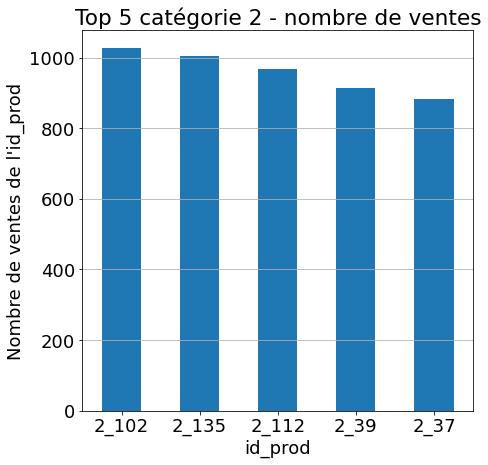

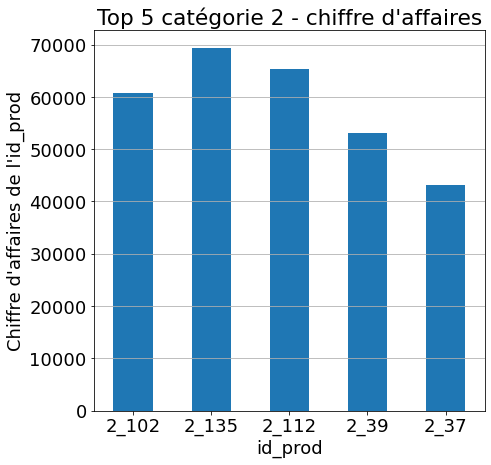

In [102]:
top_flop_ventes_categ_2['price', 'count'].head(5).plot(
    kind='bar',
    title="Top 5 catégorie 2 - nombre de ventes",
    xlabel='id_prod',
    ylabel="Nombre de ventes de l'id_prod",
    figsize=(7,7))

plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

top_flop_ventes_categ_2['price', 'sum'].head(5).plot(
    kind='bar',
    title="Top 5 catégorie 2 - chiffre d'affaires",
    xlabel='id_prod',
    ylabel="Chiffre d'affaires de l'id_prod",
    figsize=(7,7))

plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

Pour les articles de la catégorie 2, seulement le top 2 dépasse les 1000 unités vendues.

- Conclusion sur le top/flop de la catégorie 2 :
    - Top :
        - Les articles 2_102 et 2_135 rapportent dépassent chacun les 1000 unités vendues
        - Ils rapportent à eux seuls presque 130 000 € de chiffre d'affaires

    - Flop :
         - 5 articles se partagent le bas des ventes avec une ou deux unités(s) vendue(s)

## <a class="anchor" id="section_6_4">Zoom sur les catégories</a> - Tops sur les trois réunies

In [103]:
df_final

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,year,month,day,range age
0,0_1518,2022-05-20 13:21:29,s_211425,c_103,4.18,0,f,1986,36,2022,5,20,35-39
1,0_1627,2022-06-18 05:55:31,s_225494,c_103,3.99,0,f,1986,36,2022,6,18,35-39
2,0_1104,2023-02-08 17:31:06,s_338755,c_103,13.21,0,f,1986,36,2023,2,8,35-39
3,0_1390,2021-04-20 06:18:39,s_23078,c_103,19.37,0,f,1986,36,2021,4,20,35-39
4,0_1547,2022-03-15 19:54:53,s_179629,c_103,8.99,0,f,1986,36,2022,3,15,35-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1509,2021-05-15 08:17:35,s_34762,c_8114,4.99,0,m,1962,60,2021,5,15,56-60
679328,1_152,2021-11-08 17:12:27,s_116675,c_240,11.06,1,m,1998,24,2021,11,8,24-28
679329,2_207,2021-06-01 04:31:16,s_42418,c_305,50.99,2,f,1996,26,2021,6,1,24-28
679330,1_521,2022-10-18 00:38:49,s_284060,c_305,22.99,1,f,1996,26,2022,10,18,24-28


In [104]:
top_flop_ventes_categs = pd.pivot_table(df_top_flop_ventes, index="id_prod", values="price")

In [105]:
top_flop_ventes_categs

,count,sum
id_prod,,
0_0,1242.00,4657.50
0_1,487.00,5352.13
0_10,22.00,394.90
0_100,3.00,61.80
0_1000,432.00,2954.88
...,...,...
2_95,4.00,395.96
2_96,598.00,28650.18
2_97,13.00,2092.87


In [106]:
top_flop_nombre_ventes_categs = top_flop_ventes_categs.sort_values('count', ascending=False)
top_flop_ca_categs = top_flop_ventes_categs.sort_values('sum', ascending=False)

# Affichage du top 5 en terme de nombres de ventes et chiffre d'affaires toutes catégories confondues
display(top_flop_nombre_ventes_categs.head(5), 
       top_flop_ca_categs.head(5))

,count,sum
id_prod,,
1_369,2252.00,54025.48
1_417,2189.00,45947.11
1_414,2180.00,51949.40
1_498,2128.00,49731.36
1_425,2096.00,35611.04


,count,sum
id_prod,,
2_159,650.00,94893.50
2_135,1005.00,69334.95
2_112,968.00,65407.76
2_102,1027.00,60736.78
2_209,814.00,56971.86


Sans surprise, le top 5 en terme de nombre de ventes est dominé par la catégorie 1.<br />
En ce qui concerne le chiffre d'affaires, malgré un nombre plus bas en terme de ventes, le chiffre d'affaire est nettement plus haut. Cela est facilement expliqué par le fait que les produits de la catégorie 2 sont haut de gamme.

# Paniers moyens

## <a class="anchor" id="section_7_1">Panier moyen général</a> - Résultat réunissant les trois catégories

In [107]:
panier_moyen = df_final.groupby(["session_id"])["price"].sum().mean()
print("Le panier moyen est à {:,.2f} €".format(panier_moyen))

Le panier moyen est à 34.64 €


## <a class="anchor" id="section_7_2">Panier moyen par catégorie</a> - Résultats pour les catégories à l'unité

In [108]:
panier_moyen_categ_0 = df_final.loc[df_final["categ"] == 0, :]
panier_moyen_categ_0 = panier_moyen_categ_0.groupby(["session_id"])["price"].sum().mean()

print("Le panier moyen est à {:,.2f} € pour la catégorie 0.".format(panier_moyen_categ_0))

Le panier moyen est à 19.61 € pour la catégorie 0.


In [109]:
panier_moyen_categ_1 = df_final.loc[df_final["categ"] == 1, :]
panier_moyen_categ_1 = panier_moyen_categ_1.groupby(["session_id"])["price"].sum().mean()

print("Le panier moyen est à {:,.2f} € pour la catégorie 1.".format(panier_moyen_categ_1))

Le panier moyen est à 25.97 € pour la catégorie 1.


In [110]:
panier_moyen_categ_2 = df_final.loc[df_final["categ"] == 2, :]
panier_moyen_categ_2 = panier_moyen_categ_2.groupby(["session_id"])["price"].sum().mean()

print("Le panier moyen est à {:,.2f} € pour la catégorie 2.".format(panier_moyen_categ_2))

Le panier moyen est à 90.94 € pour la catégorie 2.


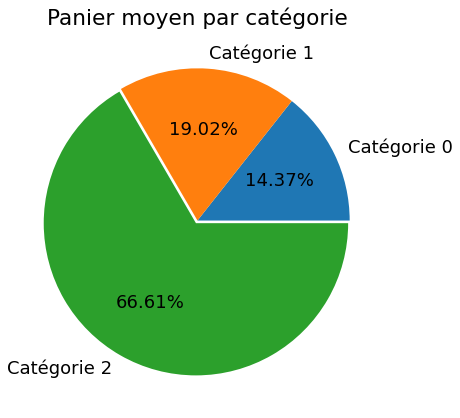

In [111]:
portion = [panier_moyen_categ_0, panier_moyen_categ_1, panier_moyen_categ_2]
labels = ["Catégorie 0", "Catégorie 1", "Catégorie 2"]

plt.figure(figsize=(11, 7)) 
plt.pie(
    portion, 
    labels=labels,
    autopct='%.2f%%',
    explode=(0, 0, 0.02),
    )
plt.title("Panier moyen par catégorie")
plt.show()

# Fréquence d'achats

## <a class="anchor" id="section_8_1">Achats mensuels par tranches d'âges</a> - Calcul de la fréquence mensuelle par tranches d'âges

In [115]:
def frequence(x):
    d = {}
    d["frequence"] = (x['session_id'].count() / x['client_id'].value_counts().count())
    return pd.Series(d, index=['frequence'])

In [116]:
df_range_age_frequence = df_B2C.groupby(['year', 'month', 'range age']).apply(frequence)

In [117]:
df_range_age_frequence = df_range_age_frequence.reset_index()
df_range_age_frequence

,year,month,range age,frequence
0,2021,3,18-23,2.66
1,2021,3,24-28,2.57
2,2021,3,29-34,5.91
3,2021,3,35-39,6.87
4,2021,3,40-44,6.38
...,...,...,...,...
331,2023,2,67-71,2.94
332,2023,2,72-76,3.12
333,2023,2,77-82,3.09
334,2023,2,83-87,2.63


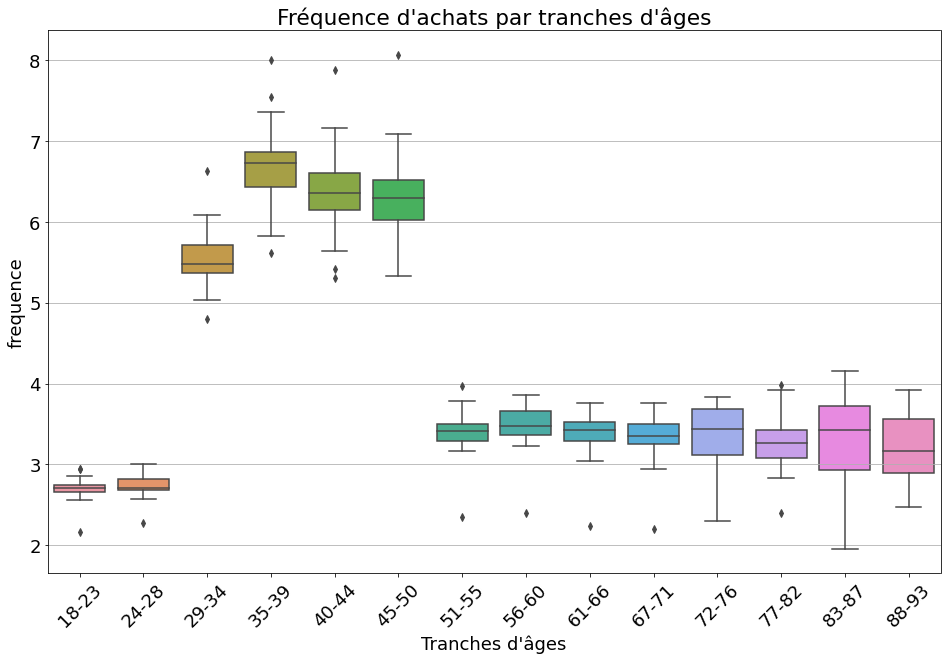

In [119]:
fig = plt.figure(1, figsize=(16,10))
sns.boxplot(x='range age', 
            y='frequence', 
            data=df_range_age_frequence, 
            showfliers=True)
plt.grid(axis='y')
plt.title("Fréquence d'achats par tranches d'âges")
plt.xticks(rotation=45)
plt.xlabel("Tranches d'âges")
plt.show()

On retrouve les mêmes tranches d'âges vers le haut pour la fréquence d'achat.

## <a class="anchor" id="section_8_2">Achats mensuels par âges</a> - Calcul de la fréquence mensuelle par âges

In [120]:
age_freq = df_B2C.groupby('age').count().reset_index()
age_freq = age_freq[['age', 'session_id']]
age_freq['freq age'] = age_freq['session_id'] / sum(age_freq['session_id'])
age_freq.head()

,age,session_id,freq age
0,18,15149,0.02
1,19,4371,0.01
2,20,4587,0.01
3,21,4252,0.01
4,22,4415,0.01


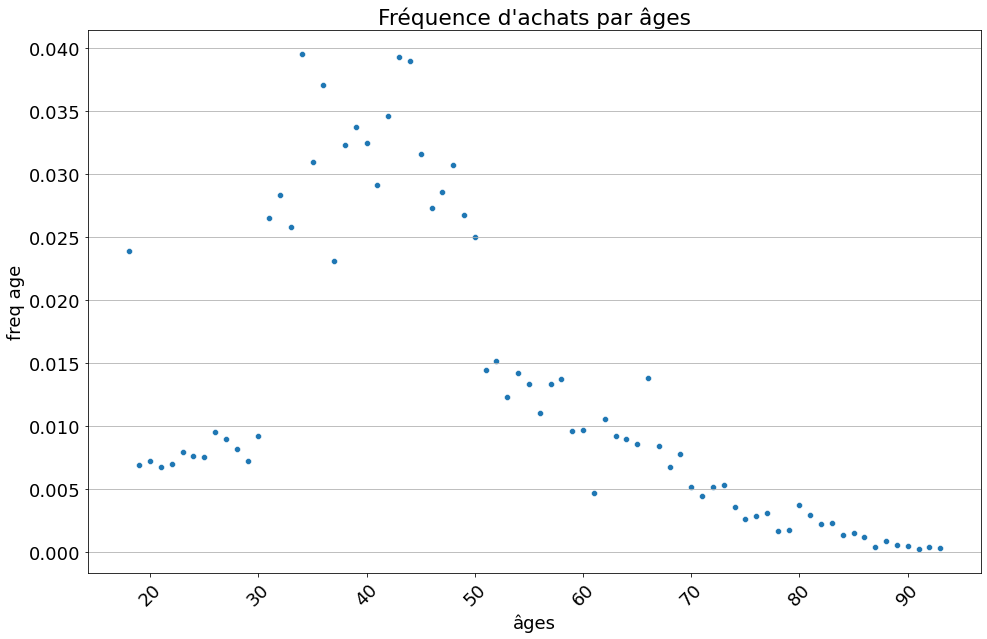

In [122]:
fig = plt.figure(1, figsize=(16,10))
sns.scatterplot(x='age', 
            y='freq age', 
            data=age_freq)
plt.grid(axis='y')
plt.title("Fréquence d'achats par âges")
plt.xticks(rotation=45)
plt.xlabel("âges")
plt.show()